In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

Importing the data file

In [2]:
df = pd.read_csv("911.csv")

**Checking the info of dataframe**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Head of dataframe**

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**What are the top 5 zip codes for 911 calls ?**

In [6]:
df["zip"].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**Top 5 townsships for 911 calls**

In [7]:
df["twp"].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**Number of Unique titles**

In [9]:
df["title"].nunique()

148

Creating new column "reason" which shows the reason for calls in title column

In [11]:
df["reason"] = df["title"].apply(lambda x: x.split(':')[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


**Number of calls for each of the reasons**

In [12]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

**Creating countplot of 911 calls by reason**

<AxesSubplot:xlabel='reason', ylabel='count'>

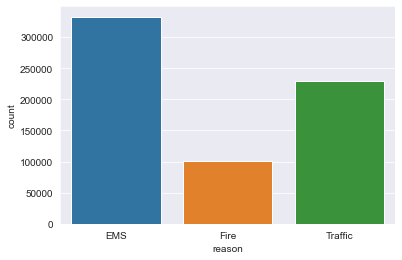

In [13]:
sns.countplot(x='reason', data=df)

In [17]:
type(df['timeStamp'].iloc[0])

str

Since the data in the timeStamp column is in "string" format. So, converting the column to data and time object.

In [18]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

Now creating four new columns for month, day of the week, date and hour.

In [28]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['date'] = df['timeStamp'].apply(lambda x: x.date())

# creating a dictonary to map day number to week name
d = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

# mapping the dictonary to day of week column
df['day of week'] = df['day of week'].map(d)

**Creating the countplot for each of reasons for 911 calls for each day**

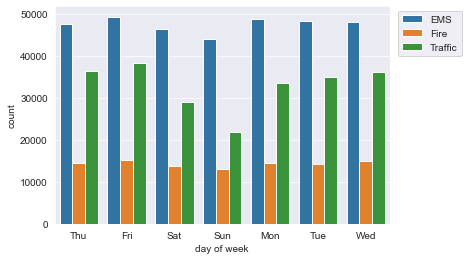

In [24]:
sns.countplot(x='day of week', data=df, hue='reason')

# relocating the legend
plt.legend(bbox_to_anchor = (1.01,1), loc=2)

**Creating the countplot for each of reasons for 911 calls for each month**

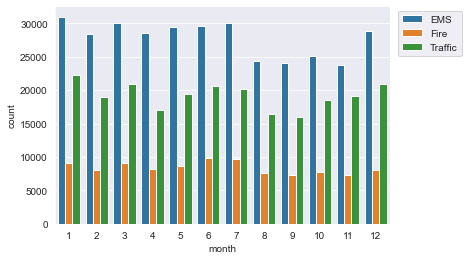

In [25]:
sns.countplot(x='month', data=df, hue='reason')

# relocating the legend
plt.legend(bbox_to_anchor = (1.01,1), loc=2)

**Creating the plot of calls by date**

<AxesSubplot:xlabel='date'>

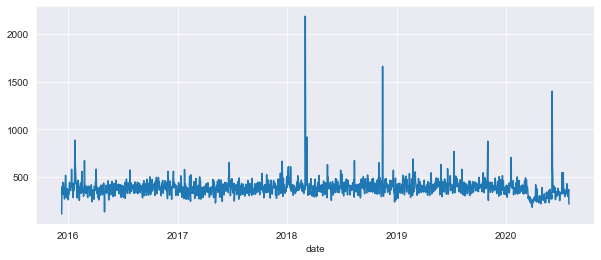

In [35]:
df.groupby('date').count()['lat'].plot(figsize=(10,4))

**Creating the plots for each of the reasons**

Text(0.5, 1.0, 'EMS')

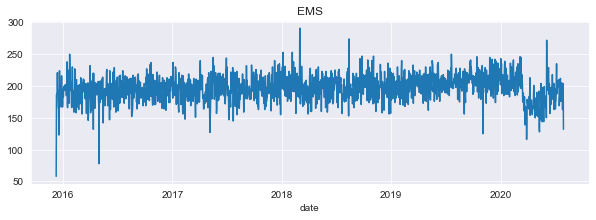

In [44]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot(figsize=(10,3))
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

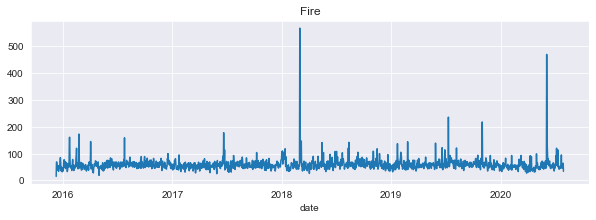

In [46]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot(figsize=(10,3))
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

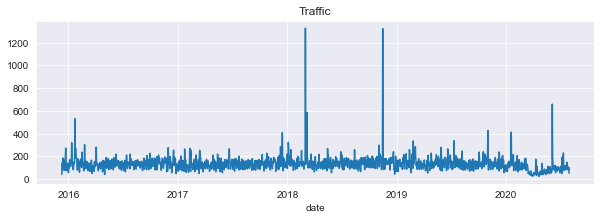

In [47]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot(figsize=(10,3))
plt.title('Traffic')

Creating a dataframe that for counts of calls at every
hour on each day of the week

In [53]:
dayhour = df.groupby(['day of week','hour']).count()['reason'].unstack()
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


**Creating heatmap and clusermap for the dataframe**

<AxesSubplot:xlabel='hour', ylabel='day of week'>

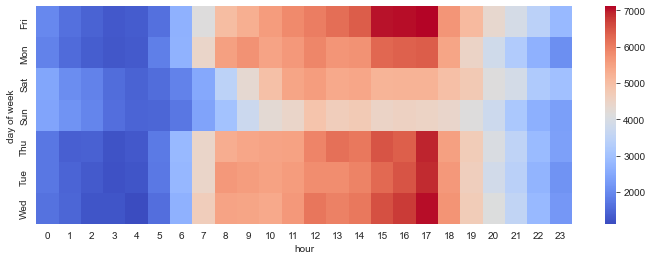

In [62]:
plt.figure(figsize=(12,4))
sns.heatmap(dayhour, cmap='coolwarm')

<Figure size 864x288 with 0 Axes>

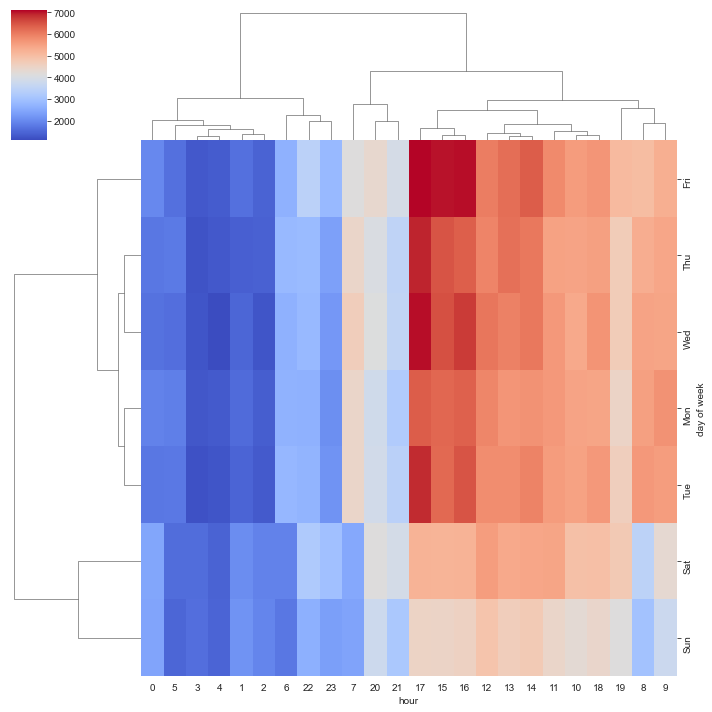

In [63]:
plt.figure(figsize=(12,4))
sns.clustermap(dayhour, cmap='coolwarm')

Creating a dataframe that for counts of calls in every month on each day of the week

In [67]:
monthday = df.groupby(['day of week', 'month']).count()['reason'].unstack()
monthday

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


**Creating the heatmap and clustermap for the dataframe**

<AxesSubplot:xlabel='month', ylabel='day of week'>

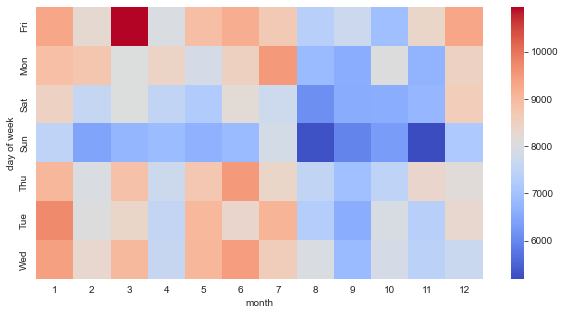

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(monthday, cmap='coolwarm')

<Figure size 720x144 with 0 Axes>

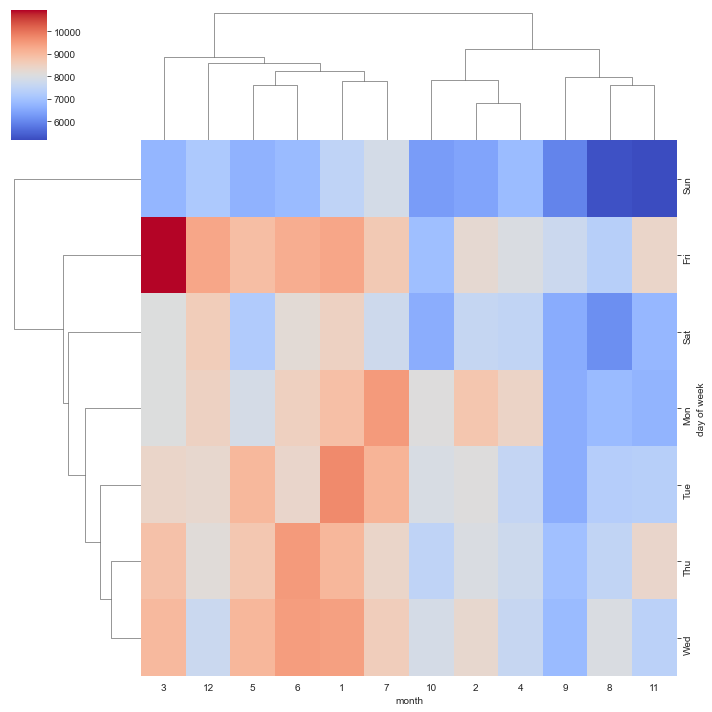

In [71]:
plt.figure(figsize=(10,2))
sns.clustermap(monthday, cmap='coolwarm')